In [1]:
def printMatrix(A, n):
    s = "".join( ("| ","|\n| ".join([("{:0.3f}\t"*n).format(*u) for u in A]), "|") )
#     print("---")
    print(s)
#     print("---")

In [84]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

m = 5000 # num samples       / rows
n = 2 # num num vars (including bias) / cols


In [85]:
w_true = 100*np.random.randn(n)
print(w_true)
def trueFunction(A, w_true):
    z = np.matmul(A, w_true)
    c = 1/z
    return c

[-147.02990505  -43.92880782]


In [86]:
# sample some data from the true distribution
A_true_uns = np.column_stack( (np.ones(m), np.random.randn(m, n-1)))

mu = np.mean(A_true_uns, axis=0)
sigma = np.std(A_true_uns, axis=0)

print(A_true_uns. shape, mu.shape, sigma.shape)

# A_true = (A_true_uns - mu) / (sigma+1e-4)
A_true = A_true_uns

y_true = trueFunction(A_true, w_true)


(5000, 2) (2,) (2,)


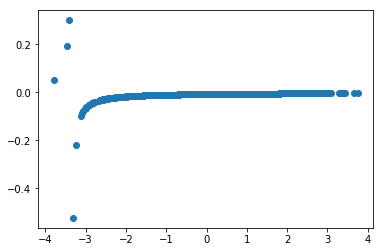

In [87]:
plt.plot(A_true[:, 1], y_true, 'o')

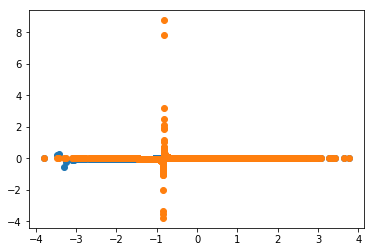

In [88]:
w = 100* np.random.randn(n)
z = np.matmul(A_true, w)


y_hat = 1/z

plt.plot(A_true[:, 1], y_true, 'o')
plt.plot(A_true[:, 1], y_hat, 'o')

In [89]:
def costGrad(w, A, y):
    Jarr = np.zeros(m)
    grad = np.zeros(n)
    for i in range(m):
        gradi = np.zeros(n)
        for j in range(n):
            x = A[i]
            z = np.matmul(x, w)
            a = 1/z

            Jarr[i] =  (y[i] - a)**2

            dJda = 2*(y[i] - a) 

            dadz = -1/(z**2)

            dzdwj = x[j]

            gradi[j] = dJda * dadz * dzdwj
            
    grad += gradi
    J = np.sum(Jarr)
    
    return J, grad

In [90]:
w = 100*np.random.randn(n) # multiplying by atleast 100 or so here was essential because 1/z

# w = np.random.randn(n)


def costGrad(A, w, y):
    z = np.matmul(A, w)
    a = 1/z
    J = np.sum((y-a)**2)
    
    dJda = 2*(a-y)
    dadz = -1/(z**2)
    dzdw = A.T
    
    grad = np.matmul(dzdw, dJda*dadz) # dJdw
    
    return J, grad



costGrad(A_true, w, y_true)

(35.63265100912929, array([ 172.97168473,  386.14704966]))

In [91]:
def checkGradients(analytic, A, w, y):
    h = 1e-3
    
    gradn = np.zeros_like(w)
    for j in range(n):
        eps = np.zeros_like(w)
        eps[j] = h
        gradn[j] += (analytic(A, w+eps, y)[0] - analytic(A, w-eps, y)[0])
        
    gradn /= 2*h
    
    print("analytic\tnumeric")
    printMatrix(zip(analytic(A, w, y)[1], gradn), n)
            

In [92]:
checkGradients(costGrad, A_true, w, y_true)

analytic	numeric
| 172.972	172.978	|
| 386.147	386.219	|


w_true: [-147.02990505  -43.92880782]
w_hat: [-127550.07749527  -63728.1315986 ]


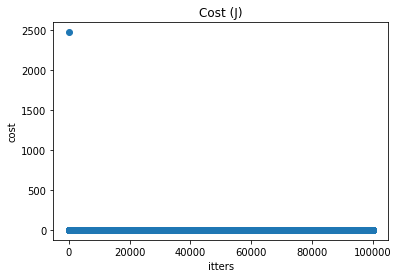

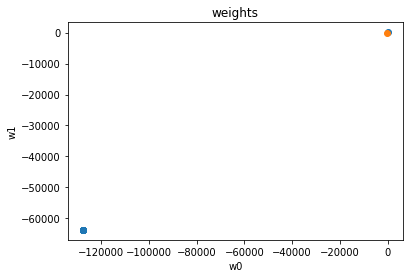

In [93]:
w = 100*np.random.randn(n) # multiplying by atleast 100 or so here was essential because 1/z
Jhist = []
whist = []
# Jhist = list(Jhist)
# whist = list(whist)

alpha = 1
for _ in range(100000):
    J, grad = costGrad(A_true, w, y_true)
    Jhist.append(J)
    whist.append(w)
    
    w = w - alpha*grad

plt.title("Cost (J)")
plt.plot(Jhist, 'o')
plt.xlabel("itters")
plt.ylabel("cost")

plt.figure()
plt.title("weights")
plt.xlabel("w0")
plt.ylabel("w1")
whist = np.array(whist)
plt.plot(whist[:, 0], whist[:, 1], 'o')

plt.plot(w_true[0], w_true[1], 'o')
plt.plot()
# print(whist)
# print(("{:.3}\n"*len(Jhist)).format(*Jhist))

print("w_true:",w_true)
print("w_hat:",w)

(1.0840083482346994, array([ -6.17755312e-04,   6.04193648e-05]))
1.08400834823
1.08281371537
1.08164455102
1.08049992736
1.07937896402
1.07828082501
1.07720471579
1.07614988072
1.07511560055
1.07410119023
1.07310599679
1.07212939744
1.07117079774
1.07022963002
1.06930535177
1.06839744422
1.06750541105
1.0666287771
1.06576708722
1.0649199052
1.06408681278
1.06326740864
1.06246130758
1.06166813967
1.06088754946
1.06011919525
1.05936274846
1.05861789289
1.05788432421
1.05716174935
1.05644988594
1.05574846187
1.05505721474
1.05437589147
1.05370424786
1.05304204816
1.05238906475
1.05174507772
1.05110987459
1.05048324993
1.0498650051
1.04925494797
1.04865289261
1.04805865903
1.047472073
1.04689296572
1.04632117367
1.0457565384
1.04519890627
1.04464812831
1.04410406003
1.04356656124
1.04303549589
1.04251073189
1.041992141
1.04147959866
1.04097298387
1.04047217903
1.03997706986
1.03948754523
1.03900349711
1.03852482038
1.0380514128
1.03758317488
1.03712000976
1.03666182319
1.03620852335
1.035

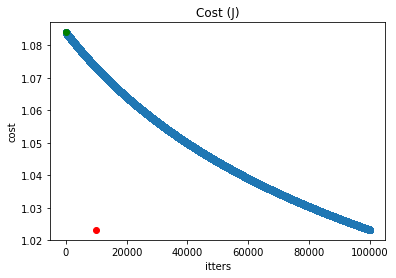

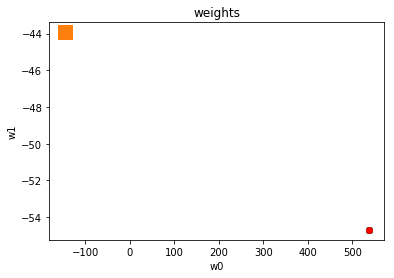

In [158]:
# w = w_true+10*np.random.randn(n) # multiplying by atleast 100 or so here was essential because 1/z
# w = np.random.randn(n)

Jhist = []
whist = []
Jhist = list(Jhist)
whist = list(whist)

alpha = 32e-1

v = np.zeros_like(w)
print(costGrad(A_true, w, y_true))
for q in range(100000):
    J, grad = costGrad(A_true, w, y_true)
    
    Jhist.append(J)
    whist.append(w)
    
#     v -= alpha*grad
#     w = w + 0.9*v
    w -= alpha*grad + w/1e7
    
    if(q%1000==0):
        print(J)

plt.title("Cost (J)")
plt.plot(Jhist, 'o')
plt.xlabel("itters")
plt.ylabel("cost")
plt.plot(0, Jhist[0], 'o', c='g')
plt.plot(10000,Jhist[-1], 'o', c='r')


plt.figure()
plt.title("weights")
plt.xlabel("w0")
plt.ylabel("w1")
whist = np.array(whist)

plt.plot(whist[:, 0], whist[:, 1], 'o')

plt.plot(w_true[0], w_true[1], 's', markersize=14)

plt.plot(whist[0, 0], whist[0, 1], 'o', c='g')
plt.plot(whist[-1, 0], whist[-1, 1], 'o', c='r')

# print(whist)
# print(("{:.3}\n"*len(Jhist)).format(*Jhist))

print(costGrad(A_true, w, y_true))
print("w_true:",w_true)
print("w_hat:",w)

w_true: [-147.02990505  -43.92880782]
w_hat: [ 529.21764455  -52.24284342]


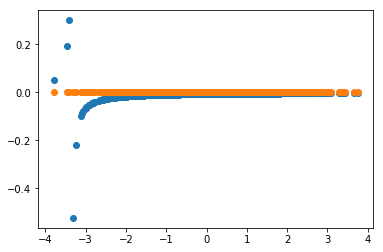

In [153]:
z = np.matmul(A_true, w)
y_hat = 1/z

plt.plot(A_true[:, 1], y_true, 'o')
plt.plot(A_true[:, 1], y_hat, 'o')

print("w_true:",w_true)
print("w_hat:",w)

## on to prob 3

In [340]:
m = 5  # num features
n = 10 # num examples

A = np.column_stack((np.ones(n), np.random.randn(n, m-1)))
P = (np.random.randn(m, m)) ** 2

y = np.random.randn(n) ** 2

print(A.shape, P.shape)

(10, 5) (5, 5)


In [341]:
def loss(A, P, y):
    z = np.zeros(n)
    a = np.zeros(n)
    
    dadz = np.zeros(n)
    dzdP = np.zeros((m,m))
    
    for i in range(n):
        x = A[i, :]
        z[i] = np.matmul(x, np.matmul(P, x))
        
        z[i] = np.abs(z[i]) #because no neg logs
        
        a[i] = z[i]/y[i] - np.log(z[i])
        
        
        dadz[i] = 1/y[i] - 1/z[i]
        dzdP += np.matmul(x[:, None],x[None, :])
        
    J = np.sum(a)
    
    grad = dzdP * np.sum(dadz)
    
    return J, grad

In [342]:
J, grad  = loss(A, P, y)
alpha = 1e-3

Jstart = J

print(J)
printMatrix(grad, m)

for _ in range(100000):
    J, grad  = loss(A, P, y)
    P -= alpha*grad
    
J, grad  = loss(A, P, y)

print("\n\n")
print(J)
printMatrix(grad, m)

print("\n", Jstart-J)

520.122113432
| 2020.710	579.303	-422.939	1430.668	-364.048	|
| 579.303	3452.796	438.908	1056.835	-1846.989	|
| -422.939	438.908	1617.451	738.274	-410.063	|
| 1430.668	1056.835	738.274	2260.895	-932.434	|
| -364.048	-1846.989	-410.063	-932.434	1624.842	|



162719482.421
| 2058.224	590.057	-430.791	1457.228	-370.807	|
| 590.057	3516.896	447.056	1076.455	-1881.277	|
| -430.791	447.056	1647.479	751.980	-417.675	|
| 1457.228	1076.455	751.980	2302.868	-949.744	|
| -370.807	-1881.277	-417.675	-949.744	1655.007	|

 -162718962.299


In [391]:
def checkGradients(analytic, A, P, y):
    h = 1e-3
    m = P.shape[0]
    w = P.ravel()
    
    gradn = np.zeros_like(w)
    for j in range(len(w)):
        eps = np.zeros_like(w)
        eps[j] = h
        gradn[j] = (analytic(A, (w+eps).reshape(m,m), y)[0] - analytic(A, (w-eps).reshape(m,m), y)[0]).ravel()
        
    gradn /= 2*h
    
    print("analytic\tnumeric")
#     print(analytic(A, P, y)[1].ravel().shape, gradn.shape)
    printMatrix(zip(analytic(A, P, y)[1].ravel(), gradn), 2)
            

In [392]:
checkGradients(loss, A, P, y)

analytic	numeric
| 2058.224	-205.822	|
| 590.057	-116.166	|
| -430.791	0.804	|
| 1457.228	-77.464	|
| -370.807	50.190	|
| 590.057	-116.167	|
| 3516.896	-96.443	|
| 447.056	2.512	|
| 1076.455	-49.137	|
| -1881.277	40.598	|
| -430.791	0.804	|
| 447.056	2.512	|
| 1647.479	-13.974	|
| 751.980	-0.020	|
| -417.675	4.270	|
| 1457.228	-77.464	|
| 1076.455	-49.137	|
| 751.980	-0.020	|
| 2302.868	-42.968	|
| -949.744	21.754	|
| -370.807	50.190	|
| -1881.277	40.598	|
| -417.675	4.270	|
| -949.744	21.754	|
| 1655.007	-24.432	|
